In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Carregar dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização (SVM gosta muito de dados normalizados!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar modelo SVM
svm = SVC(kernel='linear')  # kernel linear (reta como fronteira)
svm.fit(X_train, y_train)

# Predição
y_pred = svm.predict(X_test)

# Métricas
print("Acurácia SVM:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia SVM: 0.9777777777777777

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



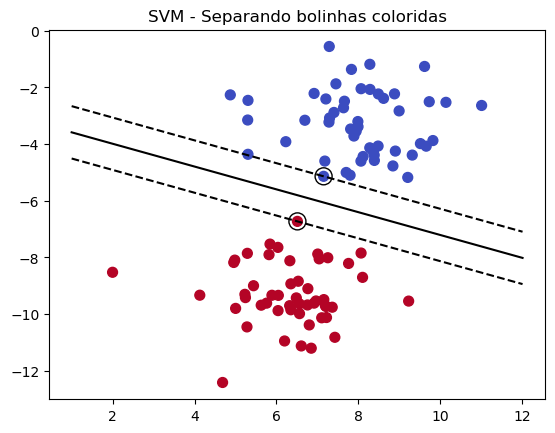

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Gerar dados sintéticos (2 classes, 2 features)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)

# Criar e treinar o modelo SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plotar os pontos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)

# Obter parâmetros da reta de decisão
w = svm.coef_[0]
b = svm.intercept_[0]
x_points = np.linspace(min(X[:,0])-1, max(X[:,0])+1)
y_points = -(w[0]/w[1])*x_points - b/w[1]

# Plotar a linha de decisão
plt.plot(x_points, y_points, 'k-')

# Plotar as margens
margin = 1 / np.sqrt(np.sum(w**2))
y_down = y_points - np.sqrt(1 + (w[0]/w[1])**2) * margin
y_up = y_points + np.sqrt(1 + (w[0]/w[1])**2) * margin
plt.plot(x_points, y_down, 'k--')
plt.plot(x_points, y_up, 'k--')

# Destacar vetores de suporte
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], s=150,
            facecolors='none', edgecolors='k')

plt.title("SVM - Separando bolinhas coloridas")
plt.show()


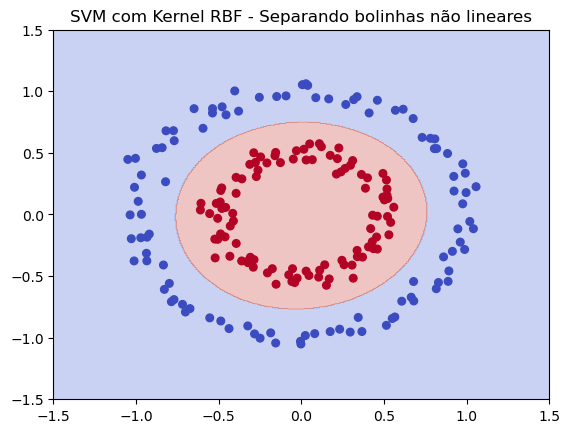

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Gerar dados em forma de círculos (não separáveis por linha reta)
X, y = datasets.make_circles(n_samples=200, factor=0.5, noise=0.05)

# Criar e treinar o modelo SVM com kernel RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X, y)

# Criar malha de pontos para desenhar fronteira
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                     np.linspace(-1.5, 1.5, 500))
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30)
plt.title("SVM com Kernel RBF - Separando bolinhas não lineares")
plt.show()
